# Iris Dataset - SOFENN Example

Demonstrate multi-class classification with SOFENN on classic Iris Dataset

In [1]:
import sys
sys.path.append("../src")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import tensorflow as tf

from sofenn.FuzzyNetwork import FuzzyNetwork
from sofenn.callbacks import InitializeFuzzyWeights

from keras.api.callbacks import ProgbarLogger

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Read in and prep Iris Dataset

In [3]:
# read in iris dataset
iris = datasets.load_iris()
# create one-hot encoded vector for each class
Y = []
for y in iris.target:
    tmp = np.zeros(3)
    tmp[y] = 1
    Y.append(tmp)
Y = np.array(Y)
    
# split to train/test
X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

In [4]:
import pandas

In [5]:
features = pandas.DataFrame(iris.data, columns=iris.feature_names)
#features.to_csv(r'C:\Users\Andrew\PycharmProjects\sofenn\tests\unit\data/iris/features.csv', index=False)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
target = pandas.DataFrame(Y, columns=iris.target_names)
#target.to_csv(r'C:\Users\Andrew\PycharmProjects\sofenn\tests\unit\data/iris/target.csv', index=False)
target.head()

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [7]:
df = pandas.concat([pandas.DataFrame(iris.data), pandas.Series(iris.target)], axis=1)
df.columns = iris.feature_names + ['target']
#df.to_csv(r'C:\Users\Andrew\PycharmProjects\sofenn\tests\unit\data/iris.csv', index=False)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#iris

In [9]:
X_train.shape

(135, 4)

In [10]:
fuzz = FuzzyNetwork(
            #input_shape=X_train.shape,           # data attributes
            features = 4,
            neurons=7,            # initialization parameters
            problem_type='classification', target_classes=3
            )

In [11]:
fuzz.summary()

Model: "FuzzyNetwork Summary"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ InputRow (InputLayer)         │ (None, 4)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ FuzzyRules (FuzzyLayer)       │ (None, 7)                 │              56 │ InputRow[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Normalize (NormalizeLayer)    │ (None, 7)                 │               0 │ FuzzyRules[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Weights (WeightedLayer)       │ (None, 7)                 │              35 │ InputRow[0][0],            │
│                               │                           │                 │ Normalize[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Outputs (OutputLayer)         │ (None, 1)                 │               0 │ Weights[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Softmax (Dense)               │ (None, 3)                 │               6 │ Outputs[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
fuzz.compile()
#fuzz.summary()

Model: "FuzzyNetwork Summary"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ InputRow (InputLayer)         │ (None, 4)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ FuzzyRules (FuzzyLayer)       │ (None, 7)                 │              56 │ InputRow[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Normalize (NormalizeLayer)    │ (None, 7)                 │               0 │ FuzzyRules[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Weights (WeightedLayer)       │ (None, 7)                 │              35 │ InputRow[0][0],            │
│                               │                           │                 │ Normalize[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Outputs (OutputLayer)         │ (None, 1)                 │               0 │ Weights[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Softmax (Dense)               │ (None, 3)                 │               6 │ Outputs[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
fuzz.get_layer("FuzzyRules")

<FuzzyLayer name=FuzzyRules, built=False>

In [12]:
#fuzz.get_layer("FuzzyRules").build(input_shape=X_train.shape)
fuzz.get_layer("FuzzyRules").get_weights()

[]

In [14]:
fuzz.summary()

Model: "FuzzyNetwork Summary"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ InputRow (InputLayer)         │ (None, 4)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ FuzzyRules (FuzzyLayer)       │ (None, 7)                 │              56 │ InputRow[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Normalize (NormalizeLayer)    │ (None, 7)                 │               0 │ FuzzyRules[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Weights (WeightedLayer)       │ (None, 7)                 │              35 │ InputRow[0][0],            │
│                               │                           │                 │ Normalize[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Outputs (OutputLayer)         │ (None, 1)                 │               0 │ Weights[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Softmax (Dense)               │ (None, 3)                 │               6 │ Outputs[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
fuzz.built

False

In [29]:
fuzz.fit(X_train, y_train, 
         #callbacks=[InitializeFuzzyWeights(sample_data=X_train)],
         #callbacks=[InitializeFuzzyWeights(sample_data=X_train)],
         epochs=10, verbose=1, batch_size=16)

Initializing Fuzzy Weights prior to training...
params attribute: {'verbose': 1, 'epochs': 10, 'steps': 9}
Model Status: True
Fuzzy rules layer Status: <FuzzyLayer name=FuzzyRules, built=True>
Fuzzy rules weights: [array([[6.467854  , 5.3714485 , 6.8717403 , 4.7747064 , 5.6248612 ,
        5.0558124 , 6.2238545 ],
       [3.1164804 , 3.3779562 , 3.090924  , 3.396642  , 2.5900605 ,
        2.3047023 , 3.2870011 ],
       [5.5719433 , 1.6716771 , 4.8685555 , 1.8757657 , 3.4207053 ,
        3.372937  , 4.6288867 ],
       [1.8832214 , 0.16481392, 1.4627591 , 0.16830179, 0.90399456,
        1.0823623 , 1.5155982 ]], dtype=float32), array([[4.0013833, 3.9640996, 4.012656 , 3.9591532, 3.9287944, 4.0971956,
        3.9818468],
       [4.000996 , 4.0167656, 3.9988983, 3.998425 , 3.997004 , 4.011026 ,
        4.0059905],
       [3.9716706, 3.9328575, 4.004332 , 3.9667637, 3.9307075, 4.06655  ,
        3.9863899],
       [3.9877286, 3.9279406, 3.990605 , 3.958916 , 3.8982577, 4.0595975,
        

In [ ]:
fuzz.built

In [19]:
c, s = fuzz.get_layer("FuzzyRules").get_weights()

In [20]:
c.shape

(4, 7)

In [21]:
s.shape

(4, 7)

In [22]:
fuzz.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Inputs (InputLayer)           │ (None, 4)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ FuzzyRules (FuzzyLayer)       │ (None, 7)                 │              56 │ Inputs[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Normalize (NormalizeLayer)    │ (None, 7)                 │               0 │ FuzzyRules[4][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Weights (WeightedLayer)       │ (None, 7)                 │              35 │ Inputs[0][0],              │
│                               │                           │                 │ Normalize[4][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Outputs (OutputLayer)         │ (None, 1)                 │               0 │ Weights[4][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Softmax (Dense)               │ (None, 3)                 │               6 │ Outputs[4][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fuzz.compile(
#     init_c=False,
#     sample_data=X_train,
#     random_sample=True,
#     init_s=False,
#     s_0=4.0
# )

In [ ]:
# # NEW
# fuzz = FuzzyNetworkModel(
#             input_shape=(4,),          # data attributes
#             neurons=5, max_neurons=100,                 # initialization parameters
#             problem_type='classification',
#             )

In [ ]:
fuzz.build(input_shape=X_train.shape)

In [ ]:
fuzz.get_layer("FuzzyRules").get_weights()

In [30]:
fuzz.get_layer("FuzzyRules").get_weights()

[array([[6.3454347 , 5.6585383 , 5.5851064 , 5.074178  , 4.8937564 ,
         6.2385664 , 5.17943   ],
        [3.4027066 , 2.8932967 , 2.8975463 , 3.8088763 , 3.572648  ,
         2.8987758 , 4.0798655 ],
        [5.662747  , 4.14562   , 3.579258  , 1.8654948 , 1.3826199 ,
         4.3608975 , 1.4749051 ],
        [2.4744115 , 1.2324878 , 1.2739335 , 0.3543922 , 0.06717464,
         1.3717555 , 0.06447888]], dtype=float32),
 array([[4.0105505, 3.954909 , 3.988414 , 3.9577901, 3.9640927, 4.0195327,
         3.9673448],
        [4.006539 , 3.9867756, 3.9966502, 3.987804 , 4.0144715, 4.0060573,
         4.0184665],
        [3.9693308, 3.9594   , 3.9866195, 3.9457276, 3.9382198, 4.031241 ,
         3.95215  ],
        [3.9231617, 3.9481552, 3.9854777, 3.9381695, 3.9044416, 4.045486 ,
         3.9160283]], dtype=float32)]

In [31]:
X_test

array([[6.4, 2.7, 5.3, 1.9],
       [6.3, 2.5, 4.9, 1.5],
       [5. , 3. , 1.6, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6. , 2.7, 5.1, 1.6],
       [4.4, 3.2, 1.3, 0.2],
       [6.1, 2.8, 4.7, 1.2],
       [7.3, 2.9, 6.3, 1.8],
       [7.2, 3.2, 6. , 1.8],
       [5.9, 3. , 5.1, 1.8],
       [6.3, 2.3, 4.4, 1.3],
       [4.9, 3.1, 1.5, 0.1],
       [4.6, 3.1, 1.5, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [7.4, 2.8, 6.1, 1.9]])

In [32]:
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [33]:
y_pred = fuzz.predict(X_test)
y_pred.round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [34]:
acc = y_test == y_pred.round()
acc

array([[ True,  True,  True],
       [ True, False, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [35]:
acc.sum() / acc.size

0.9111111111111111

## Model Prediction Results

In [36]:
pred_loss, pred_bin_acc = fuzz.evaluate(X_test, y_test)
print('Model Loss: {:0.8f}'.format(pred_loss))
print('Binary Accuracy: {:2.1f}%'.format(100*pred_bin_acc))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - categorical_accuracy: 0.8667 - loss: 1.4561
Model Loss: 1.45607376
Binary Accuracy: 86.7%


In [37]:
fuzz.metrics_names

['loss', 'compile_metrics']

## Plot Results

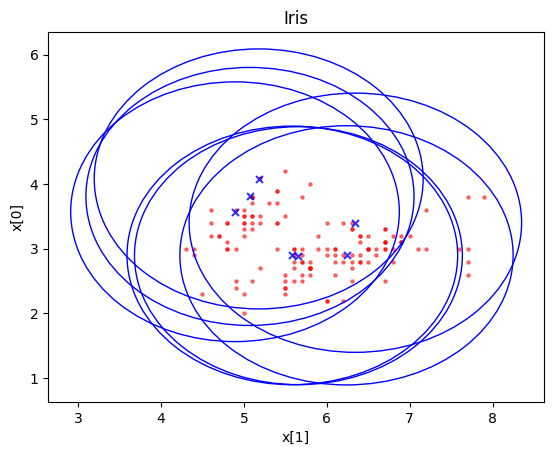

In [38]:
w = fuzz.get_layer("FuzzyRules").get_weights()


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], color='r', alpha=0.5, s=5)
for i in range(0,fuzz.neurons):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='b', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], color='b', alpha=0.8, s=25, marker='x')
plt.show()